In [276]:
import pandas as pd
sports = pd.read_csv("datasets_full/London/london_sports_participation.csv")
sports['area'] = sports['area'].str.lower()
#Focus on second year becasue data is from October to October
sports['singleYear'] = sports['year'].str[5:]
sports = sports[sports['singleYear'] != '2006']

In [277]:
#sports[(sports['sports_participation'] == 'three+') & (sports['area'] == row['area']) & (sports['singleYear'] == row['singleYear'])]['percentage'].iloc[0]
        
#Here are all the Official London Boroughs
boroughs = ['camden', 'greenwich', 'hackney', 'hammersmith and fulham', 'islington', 'kensington and chelsea', 
            'lambeth', 'lewisham', 'southwark', 'tower hamlets', 'wandsworth', 'westminster', 'barking and dagenham',
           'barnet', 'bexley', 'brent', 'bromley', 'croydon', 'ealing','enfield','haringey','harrow', 'havering',
           'hillingdon', 'hounslow', 'kingston upon thames', 'merton', 'newham', 'redbridge', 'richmond upon thames',
           'sutton','waltham forest']

In [278]:
londonSports = sports[sports.area.isin(boroughs)]
londonSports.head()

,year,area_code,area,sports_participation,percentage,population,singleYear
111,2007-2008,00AB,barking and dagenham,one+,0.268,33900.0,2008
112,2008-2009,00AB,barking and dagenham,one+,0.314,40000.0,2009
113,2009-2010,00AB,barking and dagenham,one+,0.263,34900.0,2010
114,2010-2011,00AB,barking and dagenham,one+,0.264,35600.0,2011
115,2011-2012,00AB,barking and dagenham,one+,0.290,40200.0,2012


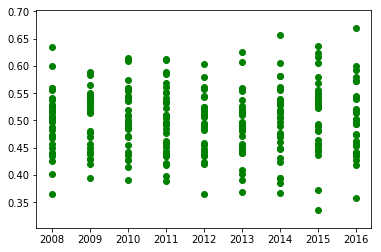

In [279]:
#Graph of people participating in zero sports in London Boroughs
import matplotlib.pyplot as plt
plt.scatter(londonSports[londonSports['sports_participation'] == 'zero']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'zero']['percentage'], 
         color='green')

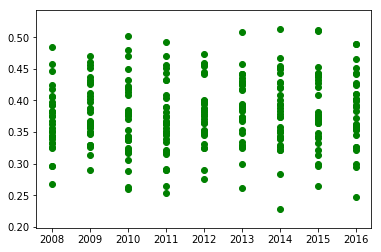

In [280]:
#Graph of people participating in one+ sports in London Boroughs
plt.scatter(londonSports[londonSports['sports_participation'] == 'one+']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'one+']['percentage'], 
         color='green')

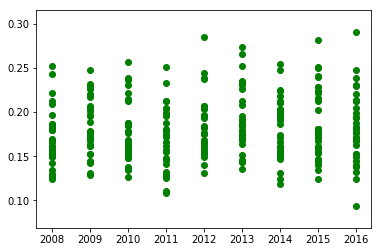

In [281]:
#Graph of people participating in three+ sports in London Boroughs
plt.scatter(londonSports[londonSports['sports_participation'] == 'three+']['singleYear'],
         londonSports[londonSports['sports_participation'] == 'three+']['percentage'], 
         color='green')

In [282]:
sports_df = londonSports.copy()
sports_df['sports_participation'].replace({
    "zero": 0,
    "one+": 1,
    "three+": 2}, inplace=True)


In [283]:

londonSports.head()

,year,area_code,area,sports_participation,percentage,population,singleYear
111,2007-2008,00AB,barking and dagenham,one+,0.268,33900.0,2008
112,2008-2009,00AB,barking and dagenham,one+,0.314,40000.0,2009
113,2009-2010,00AB,barking and dagenham,one+,0.263,34900.0,2010
114,2010-2011,00AB,barking and dagenham,one+,0.264,35600.0,2011
115,2011-2012,00AB,barking and dagenham,one+,0.290,40200.0,2012


In [284]:
sports_df = sports_df.dropna()
sports_df = sports_df.sort_values(['area', 'year', 'sports_participation'])

mod_df = pd.DataFrame(columns=['area', 'population','year', 'area_code', 'sports_participation', 'percentage'])


In [285]:
for name, group in sports_df.groupby(['area', 'year']):
    if len(group) == 3:
        group = group.loc[:, ['area', 'population','year', 'area_code', 'sports_participation', 'percentage']].reset_index(drop=True)
        group.loc[1, 'percentage'] -= group.loc[2, 'percentage']
        response_rate = group['percentage'].sum()
        group['percentage'] /= response_rate
        mod_df = mod_df.append(group)
mod_df = mod_df.reset_index(drop=True)
print(mod_df)


                     area  population       year area_code  \
0    barking and dagenham     80200.0  2007-2008      00AB   
1    barking and dagenham     33900.0  2007-2008      00AB   
2    barking and dagenham     17000.0  2007-2008      00AB   
3    barking and dagenham     74300.0  2008-2009      00AB   
4    barking and dagenham     40000.0  2008-2009      00AB   
5    barking and dagenham     20600.0  2008-2009      00AB   
6    barking and dagenham     80500.0  2009-2010      00AB   
7    barking and dagenham     34900.0  2009-2010      00AB   
8    barking and dagenham     16700.0  2009-2010      00AB   
9    barking and dagenham     82500.0  2010-2011      00AB   
10   barking and dagenham     35600.0  2010-2011      00AB   
11   barking and dagenham     17200.0  2010-2011      00AB   
12   barking and dagenham     80200.0  2011-2012      00AB   
13   barking and dagenham     40200.0  2011-2012      00AB   
14   barking and dagenham     18100.0  2011-2012      00AB   
15   bar

In [286]:
mod_df['sports_participation'].replace({
    0: "zero",
    1: "one+",
    2: "three+"}, inplace=True)


In [287]:
mod_df = mod_df.drop_duplicates()
mod_df['singleYear'] = mod_df['year'].str[5:]

In [288]:
totalYears = londonSports['singleYear'].unique()

In [329]:
import statistics
import numpy as np
totalNumZero = list(range(len(totalYears)))
totalNumOne = list(range(len(totalYears)))
totalNumThree = list(range(len(totalYears)))
count = 0
for i in totalYears:
    oneYear = mod_df[mod_df['singleYear'] == i]
    totalNumZero[count] = sum(oneYear[oneYear['sports_participation'] == 'zero']['population'])
    totalNumOne[count] = sum(oneYear[oneYear['sports_participation'] == 'one+']['population'])
    totalNumThree[count] = sum(oneYear[oneYear['sports_participation'] == 'three+']['population'])
    
    #totalNumZero[count] = np.dot(oneYear[oneYear['sports_participation'] == 'zero']['percentage'], oneYear[oneYear['sports_participation'] == 'zero']['population'])
    #totalNumOne[count] = np.dot(oneYear[oneYear['sports_participation'] == 'one+']['percentage'], oneYear[oneYear['sports_participation'] == 'one+']['population'])
    #totalNumThree[count] = np.dot(oneYear[oneYear['sports_participation'] == 'three+']['percentage'], oneYear[oneYear['sports_participation'] == 'three+']['population'])
    count=count+1

In [330]:
totalEachYear = pd.DataFrame({'year':totalYears, 
                 'totalNumZero':totalNumZero,
                 'totalNumOne':totalNumOne,
                 'totalNumThree':totalNumThree})

(array([ 5., 26., 49., 70., 49., 36., 29., 15.,  6.,  3.]),
 array([0.11366385, 0.13563079, 0.15759774, 0.17956469, 0.20153164,
        0.22349859, 0.24546554, 0.26743249, 0.28939944, 0.31136638,
        0.33333333]),
 <a list of 10 Patch objects>)

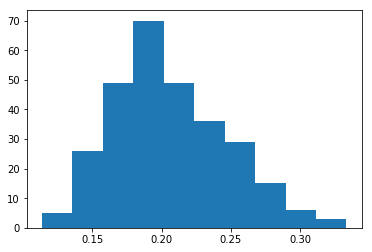

In [324]:
onlyThree = 
plt.hist(mod_df[mod_df['sports_participation'] == 'three+']['percentage'])


In [332]:
totalEachYear.head()

,year,totalNumZero,totalNumOne,totalNumThree
0,2008,3035600.0,2254200.0,1044100.0
1,2009,3081700.0,2328600.0,1097400.0
2,2010,3163500.0,2295300.0,1085800.0
3,2011,3147400.0,2302600.0,1063300.0
4,2012,3264000.0,2474700.0,1203000.0


In [333]:
sum_column = totalEachYear["totalNumZero"] + totalEachYear["totalNumOne"] + totalEachYear["totalNumThree"]
totalEachYear["totalPopulation"] = sum_column

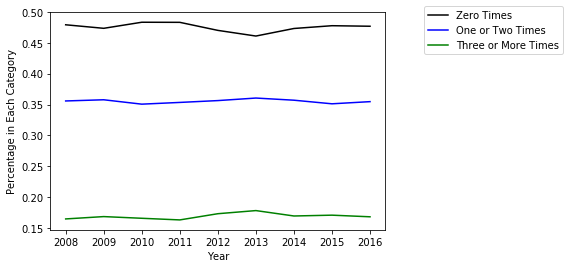

In [338]:
plt.plot(totalEachYear['year'],
         totalEachYear['totalNumZero']/totalEachYear['totalPopulation'], color='black', label = "Zero Times")
plt.plot(totalEachYear['year'],
         totalEachYear['totalNumOne']/totalEachYear['totalPopulation'], color='blue', label = "One or Two Times")
plt.plot(totalEachYear['year'],
         totalEachYear['totalNumThree']/totalEachYear['totalPopulation'], color='green', label = "Three or More Times")
plt.xlabel('Year')
plt.ylabel('Percentage in Each Category')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [339]:
money = pd.read_csv("datasets_full/London/london_taxpayer_income.csv")
money['area'] = money['area'].str.lower()

In [343]:
money2012 = money[money['year'] == '2011-2012']
money2012.sort_values('median_income')

,year,area_code,area,population,mean_income,median_income
443,2011-2012,00BB,newham,127000,22000,17600
29,2011-2012,00AB,barking and dagenham,73000,22800,19600
83,2011-2012,00AE,brent,149000,27400,20200
551,2011-2012,00BH,waltham forest,123000,25300,20300
155,2011-2012,00AJ,ealing,162000,32000,21300
317,2011-2012,00AT,hounslow,133000,32400,21800
191,2011-2012,00AL,greenwich,117000,31000,21800
245,2011-2012,00AP,haringey,116000,34600,22200
65,2011-2012,00AD,bexley,114000,28300,22300
173,2011-2012,00AK,enfield,135000,30400,22300


In [344]:
money2012 = money2012[money2012.area.isin(boroughs)]

In [347]:
money2012

,year,area_code,area,population,mean_income,median_income
29,2011-2012,00AB,barking and dagenham,73000,22800,19600
47,2011-2012,00AC,barnet,179000,39200,24200
65,2011-2012,00AD,bexley,114000,28300,22300
83,2011-2012,00AE,brent,149000,27400,20200
101,2011-2012,00AF,bromley,168000,36400,25100
119,2011-2012,00AG,camden,104000,69300,30400
137,2011-2012,00AH,croydon,171000,29700,22700
155,2011-2012,00AJ,ealing,162000,32000,21300
173,2011-2012,00AK,enfield,135000,30400,22300
191,2011-2012,00AL,greenwich,117000,31000,21800


In [348]:
sortedMoney = money[(money['year'] == '2011-2012')]
sortedMoney = sortedMoney.sort_values('median_income')
sortedMoneySub = pd.DataFrame({'Area':sortedMoney['area'].str.lower(), 'Median_Income':sortedMoney['median_income']})
newDict = dict(zip(sortedMoneySub.Area, sortedMoneySub.Median_Income))

In [357]:
x = list(range(32)) 
mapData = pd.DataFrame({'area':boroughs, 'Nums':x})


In [358]:
mapData['Median_Income'] = mapData['area'].map(newDict)

In [363]:
def calculate_category(cityName, categoryName, startingYear):
    sportsSubset = sports[(sports['area'] == cityName) & (sports['sports_participation'] == categoryName)]
    sportsSubset1 = sportsSubset[sportsSubset['singleYear'] == startingYear]
    if(len(sportsSubset1['percentage']) == 0):
        return(float('nan'))
    return sportsSubset1['percentage'].iloc[0]

In [364]:
mapData['Zero_10-11'] = mapData['Nums']
mapData['Zero_11-12'] = mapData['Nums']
mapData['Zero_12-13'] = mapData['Nums']
mapData['One_10-11'] = mapData['Nums']
mapData['One_11-12'] = mapData['Nums']
mapData['One_12-13'] = mapData['Nums']
mapData['Three_10-11'] = mapData['Nums']
mapData['Three_11-12'] = mapData['Nums']
mapData['Three_12-13'] = mapData['Nums']

In [367]:
for i in range(len(mapData)):
    mapData['Zero_10-11'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'zero', '2011')
    mapData['Zero_11-12'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'zero', '2012')
    mapData['Zero_12-13'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'zero', '2013')
    mapData['One_10-11'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'one+', '2011')
    mapData['One_11-12'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'one+', '2012')
    mapData['One_12-13'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'one+', '2013')
    mapData['Three_10-11'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'three+', '2011')
    mapData['Three_11-12'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'three+', '2012')
    mapData['Three_12-13'].iloc[i] = calculate_category(mapData['area'].iloc[i], 'three+', '2013')

In [368]:
mapData

,area,Nums,Median_Income,Zero_10-11,Zero_11-12,Zero_12-13,One_10-11,One_11-12,One_12-13,Three_10-11,Three_11-12,Three_12-13
0,camden,0,30400.0,0.434,0.448,0.410,0.409,0.395,0.457,0.172,0.183,0.233
1,greenwich,1,21800.0,0.532,0.519,0.522,0.319,0.365,0.334,0.132,0.154,0.151
2,hackney,2,23300.0,0.456,0.496,0.482,0.390,0.379,0.389,0.180,0.207,0.179
3,hammersmith and fulham,3,27600.0,0.451,0.434,0.442,0.451,0.473,0.442,0.199,0.197,0.273
4,islington,4,28100.0,0.462,0.442,0.391,0.374,0.442,0.431,0.173,0.207,0.235
5,kensington and chelsea,5,37200.0,0.444,0.424,0.440,0.433,0.455,0.442,0.204,0.285,0.252
6,lambeth,6,24600.0,0.422,0.436,0.449,0.471,0.397,0.425,0.233,0.203,0.231
7,lewisham,7,22900.0,0.551,0.491,0.472,0.346,0.349,0.374,0.155,0.182,0.144
8,southwark,8,24300.0,0.494,0.459,0.493,0.404,0.384,0.386,0.179,0.193,0.191
9,tower hamlets,9,24700.0,0.496,0.517,0.512,0.381,0.370,0.389,0.162,0.167,0.185


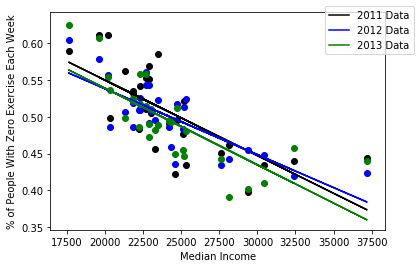

In [383]:
graphData = mapData.dropna()
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Zero_10-11'], color='black', label='_nolegend_')
y = graphData['Zero_10-11']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', label = "2011 Data")
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Zero_11-12'], color='blue', label='_nolegend_')
y = graphData['Zero_11-12']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label = "2012 Data")

x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Zero_12-13'], color='green', label='_nolegend_')
y = graphData['Zero_12-13']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', label = "2013 Data")

plt.xlabel('Median Income')
plt.ylabel('% of People With Zero Exercise Each Week')
plt.legend(bbox_to_anchor=(1.1, 1.05))


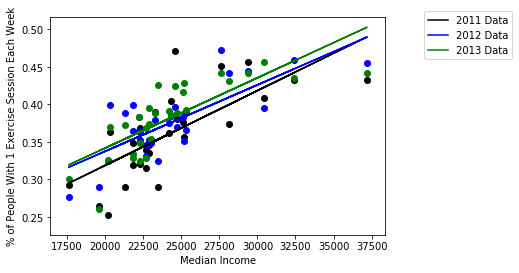

In [385]:
graphData = mapData.dropna()
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['One_10-11'], color='black', label='_nolegend_')
y = graphData['One_10-11']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', label = "2011 Data")
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['One_11-12'], color='blue', label='_nolegend_')
y = graphData['One_11-12']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label = "2012 Data")

x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['One_12-13'], color='green', label='_nolegend_')
y = graphData['One_12-13']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', label = "2013 Data")

plt.xlabel('Median Income')
plt.ylabel('% of People With 1 Exercise Session Each Week')
plt.legend(bbox_to_anchor=(1.1, 1.05))


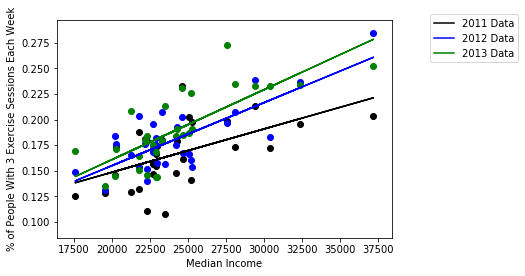

In [386]:
graphData = mapData.dropna()
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Three_10-11'], color='black', label='_nolegend_')
y = graphData['Three_10-11']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', label = "2011 Data")
x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Three_11-12'], color='blue', label='_nolegend_')
y = graphData['Three_11-12']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label = "2012 Data")

x = graphData['Median_Income']
plt.scatter(graphData['Median_Income'], graphData['Three_12-13'], color='green', label='_nolegend_')
y = graphData['Three_12-13']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', label = "2013 Data")

plt.xlabel('Median Income')
plt.ylabel('% of People With 3 Exercise Sessions Each Week')
plt.legend(bbox_to_anchor=(1.1, 1.05))


In [326]:
overallLondon = sports[sports['area'] == 'london']

In [327]:
overallLondon

,year,area_code,area,sports_participation,percentage,population,singleYear
61,2007-2008,H,london,one+,0.370,2258700.0,2008
62,2008-2009,H,london,one+,0.380,2333400.0,2009
63,2009-2010,H,london,one+,0.368,2300900.0,2010
64,2010-2011,H,london,one+,0.366,2305900.0,2011
65,2011-2012,H,london,one+,0.378,2485700.0,2012
66,2012-2013,H,london,one+,0.385,2555000.0,2013
67,2013-2014,H,london,one+,0.380,2545700.0,2014
68,2014-2015,H,london,one+,0.380,2584800.0,2015
69,2015-2016,H,london,one+,0.378,2607900.0,2016
491,2007-2008,H,london,three+,0.172,1046700.0,2008


In [ ]:
mod_df

In [ ]:
x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_10-11'], color='black')
y = graphData['Zero_10-11']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black')

x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_11-12'], color='blue')
y = graphData['Zero_11-12']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue')

x = graphData['IncomeCategory']
plt.scatter(graphData['IncomeCategory'], graphData['Zero_12-13'], color='green')
y = graphData['Zero_12-13']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green')

In [393]:
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Zero_10-11'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5128652297644916
intercept: 0.7551309727147281
slope: [-1.02646854e-05]


In [394]:
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Zero_11-12'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6086181820972263
intercept: 0.7174672543356091
slope: [-8.96696067e-06]


In [395]:
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Zero_12-13'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5853411762294299
intercept: 0.7473295503210472
slope: [-1.04237708e-05]


In [396]:
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['One_10-11'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['One_11-12'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['One_12-13'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5223278416712407
intercept: 0.1192677598577889
slope: [9.97114447e-06]
coefficient of determination: 0.5838287001370286
intercept: 0.16028478199267196
slope: [8.85918033e-06]
coefficient of determination: 0.6100115120305444
intercept: 0.15433958832398573
slope: [9.37277041e-06]


In [397]:
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Three_10-11'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Three_11-12'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
from sklearn.linear_model import LinearRegression
xData = np.array(graphData['Median_Income']).reshape(-1,1)
yData = np.array(graphData['Three_12-13'])
model = LinearRegression()
model.fit(xData, yData)
r_sq = model.score(xData, yData)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.3014453019445926
intercept: 0.06378214678608485
slope: [4.23451173e-06]
coefficient of determination: 0.5882192521205745
intercept: 0.031660751863038766
slope: [6.16158244e-06]
coefficient of determination: 0.5822062478236565
intercept: 0.023943044595749058
slope: [6.84141674e-06]


In [399]:
import seaborn as sns
import statsmodels.formula.api as smf

model_interaction = model_glm._results.params(formula='Zero_Pct ~ Area*Year', data=graphData).fit()
summary = model_interaction.summary()
summary.tables[1]

NameError: name 'model_glm' is not defined